<a href="https://colab.research.google.com/github/AnikaRanjan/MDST/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Optimization

### **All exercises will be using your chosen dataset**

## Step 1: Import your dataset using the tutorial from the slides

## Step 2: Install necessary libraries. We will be using scikit-learn again for week 4

In [50]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve, CalibrationDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, accuracy_score, classification_report, ConfusionMatrixDisplay

## Exercises

### Scikit-Learn Docs, ML Interpretability Book, and Demo for Reference

#### [Scikit-Learn](https://scikit-learn.org/stable/)
#### [ML Interpretability](https://christophm.github.io/interpretable-ml-book/)
#### [Demo](https://mdst-ai-in-healthcare.streamlit.app/)


Import your **preprocessed dataset** from week 3

In [51]:
# TODO: Load your dataset with pandas
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset_clean_2.csv')
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Heart Rate Categoricl,Sleep Duration Log,Sleep Duration * Stress Level,Physical Activity Level Categorical,Physical Activity Encoded
0,0,27,6.1,6,42,6,77,4200,0,High,1.960095,36.6,low,0.0
1,0,28,6.2,6,60,8,75,10000,0,Normal,1.974081,49.6,medium,1.0
2,0,28,6.2,6,60,8,75,10000,0,Normal,1.974081,49.6,medium,1.0
3,0,28,5.9,4,30,8,85,3000,1,High,1.931521,47.2,low,0.0
4,0,28,5.9,4,30,8,85,3000,1,High,1.931521,47.2,low,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0
370,1,59,8.0,9,75,3,68,7000,1,Normal,2.197225,24.0,high,2.0
371,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0
372,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0


In [91]:
df.loc[df['Sleep Disorder'] == 2, 'Sleep Disorder'] = 1
df['Sleep Disorder'].nunique()

2

### Exercise 1: Cross Validation Evaluations

Rather than evaluating a model on a simple train-test split like we did in week 3, we can use cross validation to provide a more robust and accurate estimate of model performance. This method splits the data up into k subsets (k can be tuned) and is trained k times with k-1 subsets used for training and 1 subset for testing.

In [92]:
# TODO: Define the features and the target data
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']
X = pd.get_dummies(X, columns=['Heart Rate Categoricl', 'Physical Activity Level Categorical'], drop_first=True)
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Heart Rate Categoricl,Sleep Duration Log,Sleep Duration * Stress Level,Physical Activity Level Categorical,Physical Activity Encoded
0,0,27,6.1,6,42,6,77,4200,0,High,1.960095,36.6,low,0.0
1,0,28,6.2,6,60,8,75,10000,0,Normal,1.974081,49.6,medium,1.0
2,0,28,6.2,6,60,8,75,10000,0,Normal,1.974081,49.6,medium,1.0
3,0,28,5.9,4,30,8,85,3000,1,High,1.931521,47.2,low,0.0
4,0,28,5.9,4,30,8,85,3000,1,High,1.931521,47.2,low,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0
370,1,59,8.0,9,75,3,68,7000,1,Normal,2.197225,24.0,high,2.0
371,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0
372,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0


In [93]:
# TODO: initialize the model that you used in week 3. Either LinearRegression() or LogisticRegression()
cv_model = LogisticRegression()

Now we will calculate the cross validation scores using cross_val_score(). This outputs an array of k scores. These scores depict how well the model generalizes to new, unseen data. The defualt scoring for **regression** is **R^2** and the default for **classification** is **accuracy**.

In [94]:
# TODO: Calculate the cross validation score for this model on your data (use k=5)
scores = cross_val_score(cv_model, X, y, cv=5)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [95]:
# TODO: Print the array of scores as well as the mean and standard deviation using np.mean() and np.std()
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.73333333 0.93333333 0.96       0.90666667 0.41891892]
0.7904504504504504
0.20197367198470642


How well does the model that you used generalize to unseen data? What factors might influence a model to not generalize well?

### Exercise 2: Regularization

**Regularization** is a technique that helps prevent a model from overfitting. Remember that overfitting is when a model learns noise in the training data and doesn't generalize to patterns. Underfitting on the other hand is when a model is too simple and doesn't understand the underlying structure in the data. Regularization adds a penalty term to a models cost function. A cost function calculates the models average errors between the predictions and the actual values. This penalty constrains the model from learning noise in the data and instead learns the patterns and encourages the model to generalize to unseen data.

**Lasso Regression (L1 Regularizer):** Adds the absolute value of the coefficients to the cost function. Good for selecting quality features and simplifying model coefficients

**Ridge Regression (L2 Regularizer):** Adds the squared magnitude of all the coefficients to the cost function. This is best used to deal with multicollinearity issues.

**ElasticNet Regression:** Combines both L1 and L2 regression to the cost function. Gives the best of both worlds.

If you used **linear regression:**

We will be using the regularizer **ElasticNet Regression**

In [96]:
# TODO: Initialize the ElasticNet model and use a small alpha to start to start (ElasticNet())
# Higher values of alpha result in better generalization but can cause underfitting and lower values can lead to overfitting
elastic_net = ElasticNet(alpha=0.001)

In [97]:
# TODO: using the model, run another cross validation evaluation
scores = cross_val_score(elastic_net, X, y, cv=5)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.274e+01, tolerance: 7.465e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+01, tolerance: 7.465e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+01, tolerance: 7.306e

In [98]:
# TODO: Print the array of scores as well as the mean and standard deviation using np.mean() and np.std()
print(scores)
print(np.mean(scores))
print(np.std(scores))

[-0.18977843 -0.3119957   0.53346035 -0.0120716   0.37062321]
0.07804756597321214
0.3240331129766058


Has the generalization of your model improved?

If you used **logistic regression:**

The Logistic Regression Model automatically uses L2 regularization by default. You will be comparing the difference between the cross validation score on the L2 regularizer and the ElasticNet regularizer.

In [99]:
# TODO: Initialize an L1 regularized logistic regression model using penalty="elasticnet"
elastic_net = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5)

In [100]:
# TODO: using the model, run another cross validation evaluation
scores = cross_val_score(elastic_net, X, y, cv=5)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [101]:
# TODO: Print the array of scores as well as the mean and standard deviation using np.mean() and np.std()
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.58666667 0.58666667 0.58666667 0.58666667 0.58108108]
0.5855495495495495
0.002234234234234256


Has the generalization of your model improved?

Experiment with L1 and L2 Regularization and see which one gives the best cross validation scores.

### Exercise 3: Probability Calibration

Using predict_proba, we can calculate the probabilities of each class in classification. This can provide information in the confidence of a model for a particular class. However these probabilities don't reflect the empirical (real-world) probabilities of the classes that we are predicting. That is where probability calibration comes in. Probability calibration takes uncalibrated probabilities and maps them to more interpretable and accurate probabilities. For example, events with a predicted probability of 70% occur 70% of the time. The CalibratedClassifierCV in scikit-learn uses cross-validation to fit the model for optimizing the probabilities.

For the purposes of this exercise, we will be using a base classifier that has not been trained yet (CalibratedClassifierCV takes care of the training automatically)

In [102]:
# TODO: Define a LogisticRegression() Model optionally using the a custom regularizer
logistic_model = LogisticRegression()

There are different methods of mapping uncalibrated to calibrated probabilities.

**Sigmoid (Platt Scaling):** Fits a Logistic Regression Model; ideal for smaller datasets

**Isotonic Regression:** A more flexible approach that works better on larger (>1000) datasets

In [103]:
# TODO: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# TODO: Create a CalibratedClassifierCV() object with cv=5 and estimator=logistic_model. Choose your desired method
calibrated = CalibratedClassifierCV(estimator=logistic_model, cv=5, method="isotonic")

In [105]:
# TODO: Fit the calibrated model using the train data
calibrated.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

CalibratedClassifierCV(cv=5, estimator=LogisticRegression(), method='isotonic')

In [106]:
# TODO: Next, fit the base logistic_model without any calibration
logistic_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
logistic_model.fit(X_train, y_train)
logistic_model_predictions = logistic_model.predict(X_test)
logistic_model.coef_

#ConfusionMatrixDisplay.from_predictions(y_test, logistic_model_predictions, normalize="true")
#plt.title("Confusion Matrix")
#plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 2.15099610e-01,  2.53948460e-01, -1.00284543e+00,
        -1.24747278e+00,  4.43583146e-02,  5.17229698e-01,
         1.18253397e-01, -3.59616513e-04, -1.61347509e-01,
        -1.58128512e-01, -1.50965098e-01, -1.63488316e-01,
         1.14996920e-01, -1.42674693e-01]])

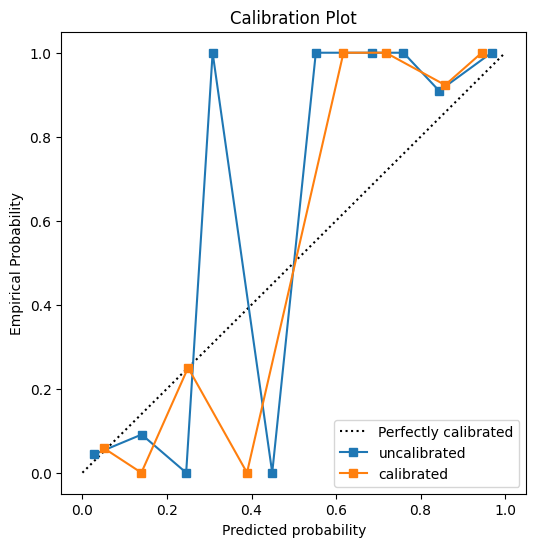

In [109]:
# TODO: Run this code block to graph the calibrated and uncalibrated probabilities for the model
fig, ax = plt.subplots(figsize=(6, 6))

# Default calibration curve (base model)
CalibrationDisplay.from_estimator(
     logistic_model,
     X_test, y_test,
     n_bins=10,
     strategy="uniform",
     name="uncalibrated",
     ax=ax
)

# Calibrated curve (calibrated model)
CalibrationDisplay.from_estimator(
     calibrated,
     X_test, y_test,
     n_bins=10,
     strategy="uniform",
     name="calibrated",
     ax=ax
)

ax.set_title("Calibration Plot")
ax.set_xlabel("Predicted probability")
ax.set_ylabel("Empirical Probability")
ax.legend(loc="best")
plt.show()

Did the probability calibration improve your models predicted probabilities? How well calibrated are your probabilities for the new model?

### Exercise 5: More Advanced Algorithms

So far, we have only been using logistic and linear regression which are very simple models that might not capture the underlying structure of the data you are working with. We will now be looking into other models the scikit-learn has to offer.

If your task is **regression**, ceate these models.

#### Random Forest Regressor:
Ensemble method that constucts many decision trees and averages the predictions for each tree

In [110]:
# TODO: Initialize the model (RandomForestRegressor())
RandomForestRegressor()

RandomForestRegressor()

In [111]:
# TODO: Calculate the cross validation score for this model on your data
scores = cross_val_score(RandomForestRegressor(), X, y, cv=5)

In [112]:
# TODO: Print the array of scores as well as the mean and standard deviation using np.mean() and np.std()
print(scores)
print(np.mean(scores))
print(np.std(scores))

[ 0.46733797  0.31235445 -0.56377232  0.18752271 -0.30999477]
0.018689608952429528
0.3907235148763899


#### Support Vector Regressor
Similar to Support Vector Machine, but for regression. Finds the optimal hyperplane to the given data with a defined tolerance or margin for error rather than minimizing the error for every single data point.

In [113]:
# TODO: Initialize the model (SVR())
SVR()

SVR()

In [114]:
# TODO: Calculate the cross validation score for this model on your data
scores = cross_val_score(SVR(), X, y, cv=5)

In [115]:
# TODO: Print the array of scores as well as the mean and standard deviation using np.mean() and np.std()
print(scores)
print(np.mean(scores))
print(np.std(scores))

[ 0.05533409  0.21490733 -0.6913562  -5.10216037 -1.12813753]
-1.3302825371595604
1.948522365395037


If your task is **classification**, ceate these models.

#### Random Forest Classifier
Similar to the RandomForestRegressor, but instead of taking th average of the decision trees, it takes the most likely class given the class outputs of the individual trees.

In [116]:
# TODO: Initialize the model (RandomForestClassifier())
RandomForestClassifier()

RandomForestClassifier()

In [117]:
# TODO: Calculate the cross validation score for this model on your data
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)

In [118]:
# TODO: Print the array of scores as well as the mean and standard deviation using np.mean() and np.std()
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.69333333 0.73333333 0.81333333 0.45333333 0.10810811]
0.5602882882882882
0.2559623582422717


#### Support Vector Machine:
Finds an optimal hyperplane that maximizes the distance between the classes that the model is predicting

In [119]:
# TODO: Initialize the model (SVC())
SVC()

SVC()

In [120]:
# TODO: Calculate the cross validation score for this model on your data
scores = cross_val_score(SVC(), X, y, cv=5)

In [121]:
# TODO: Print the array of scores as well as the mean and standard deviation using np.mean() and np.std()
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.56       0.58666667 0.58666667 0.58666667 0.14864865]
0.4937297297297298
0.17284937025250796


In [122]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset_clean_4.csv'
df.to_csv(file_path, index=False)
#df.to_csv('Sleep_health_and_lifestyle_dataset_clean_2.csv', index=False)

In [123]:
import xgboost as xgb


Which model had the best overall cross-validation score?

### Exercise 6: Further Exploration

Keep experimenting with different models, regularizers, etc...